In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
%config InlineBackend.figure_format='svg'
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import collections

In [2]:
df = pd.read_csv('credit_dataset.csv')
df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [3]:
df.shape

(1000, 21)

In [4]:
df.describe()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.183000,20.903000,2.292000,2.965000,3271.24800,1.874000,2.44600,2.973000,2.372000,...,2.845000,2.358000,35.54200,1.814000,1.928000,1.367000,2.904000,1.155000,1.404000,1.037000
std,0.458487,0.835589,12.058814,0.620581,0.971967,2822.75176,1.196476,1.10558,1.118715,1.067125,...,1.103718,1.050209,11.35267,0.389301,0.530186,0.482228,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,1.000000,1.000000,250.00000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.000000,2.000000,1365.50000,1.000000,2.00000,2.000000,1.000000,...,2.000000,1.000000,27.00000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.000000,3.000000,2319.50000,1.000000,2.00000,3.000000,3.000000,...,3.000000,2.000000,33.00000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,3.000000,24.000000,3.000000,4.000000,3972.25000,3.000000,4.00000,4.000000,3.000000,...,4.000000,3.000000,42.00000,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,3.000000,72.000000,3.000000,4.000000,18424.00000,4.000000,4.00000,4.000000,4.000000,...,4.000000,4.000000,75.00000,2.000000,3.000000,2.000000,4.000000,2.000000,2.000000,2.000000


In [5]:
df.isnull().sum()

credit.rating                     0
account.balance                   0
credit.duration.months            0
previous.credit.payment.status    0
credit.purpose                    0
credit.amount                     0
savings                           0
employment.duration               0
installment.rate                  0
marital.status                    0
guarantor                         0
residence.duration                0
current.assets                    0
age                               0
other.credits                     0
apartment.type                    0
bank.credits                      0
occupation                        0
dependents                        0
telephone                         0
foreign.worker                    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
credit.rating                     1000 non-null int64
account.balance                   1000 non-null int64
credit.duration.months            1000 non-null int64
previous.credit.payment.status    1000 non-null int64
credit.purpose                    1000 non-null int64
credit.amount                     1000 non-null int64
savings                           1000 non-null int64
employment.duration               1000 non-null int64
installment.rate                  1000 non-null int64
marital.status                    1000 non-null int64
guarantor                         1000 non-null int64
residence.duration                1000 non-null int64
current.assets                    1000 non-null int64
age                               1000 non-null int64
other.credits                     1000 non-null int64
apartment.type                    1000 non-null int64
bank.credits                  

In [7]:
df.rename(columns={"credit.rating": "credit_rating",
                    "account.balance": "account_balance",
                    "credit.duration.months": "credit_duration_months",
                    "previous.credit.payment.status": "previous_credit_payment_status",
                    "credit.purpose": "credit_purpose",
                    "credit.amount": "credit_amount",
                    "employment.duration": "employment_duration",
                    "installment.rate": "installment_rate",
                    "marital.status": "marital_status",
                    "residence.duration": "residence_duration",
                    "current.assets": "current_assets",
                    "other.credits": "other_credits",
                    "apartment.type": "apartment_type",
                    "bank.credits": "bank_credits",
                    "foreign.worker": "foreign_worker"}, inplace=True)

## Relationship between Features and Credit.Rating

In [8]:
paid = df[df['credit_rating'] == 1]
not_paid = df[df['credit_rating'] == 0]

print("Paid: {} ({:.2f})".format(len(paid), float(len(paid))/len(df)*100.0))
print("Not Paid: {} ({:.2f})".format(len(not_paid), float(len(not_paid)/len(df)*100)))

Paid: 700 (70.00)
Not Paid: 300 (30.00)


In [9]:
df.groupby('credit_rating').credit_rating.value_counts()

credit_rating  credit_rating
0              0                300
1              1                700
Name: credit_rating, dtype: int64

In [10]:
df.groupby('account_balance').credit_rating.value_counts()

account_balance  credit_rating
1                1                139
                 0                135
2                1                164
                 0                105
3                1                397
                 0                 60
Name: credit_rating, dtype: int64

In [11]:
df.groupby('credit_duration_months').credit_rating.value_counts()

credit_duration_months  credit_rating
4                       1                  6
5                       1                  1
6                       1                 66
                        0                  9
7                       1                  5
8                       1                  6
                        0                  1
9                       1                 35
                        0                 14
10                      1                 25
                        0                  3
11                      1                  9
12                      1                130
                        0                 49
13                      1                  4
14                      1                  3
                        0                  1
15                      1                 52
                        0                 12
16                      0                  1
                        1                  1
18               

In [12]:
df.groupby('previous_credit_payment_status').credit_rating.value_counts()

previous_credit_payment_status  credit_rating
1                               0                 53
                                1                 36
2                               1                361
                                0                169
3                               1                303
                                0                 78
Name: credit_rating, dtype: int64

In [13]:
df.groupby('credit_purpose').credit_rating.value_counts()

credit_purpose  credit_rating
1               1                 86
                0                 17
2               1                123
                0                 58
3               1                268
                0                 96
4               1                223
                0                129
Name: credit_rating, dtype: int64

In [14]:
df.groupby('credit_amount').credit_rating.value_counts()

credit_amount  credit_rating
250            1                1
276            1                1
338            1                1
339            1                1
343            1                1
362            1                1
368            1                1
385            1                1
392            1                1
409            1                1
426            1                1
428            1                1
433            0                2
448            0                1
454            1                1
458            1                1
484            1                1
518            1                1
522            1                1
571            1                1
585            1                1
590            1                1
601            1                1
609            0                1
               1                1
618            1                1
625            1                1
626            0                1
629            1   

In [15]:
df.groupby('savings').credit_rating.value_counts()

savings  credit_rating
1        1                386
         0                217
2        1                 69
         0                 34
3        1                 94
         0                 17
4        1                151
         0                 32
Name: credit_rating, dtype: int64

In [16]:
df.groupby('employment_duration').credit_rating.value_counts()

employment_duration  credit_rating
1                    1                141
                     0                 93
2                    1                235
                     0                104
3                    1                135
                     0                 39
4                    1                189
                     0                 64
Name: credit_rating, dtype: int64

In [17]:
df.groupby('installment_rate').credit_rating.value_counts()

installment_rate  credit_rating
1                 1                102
                  0                 34
2                 1                169
                  0                 62
3                 1                112
                  0                 45
4                 1                317
                  0                159
Name: credit_rating, dtype: int64

In [18]:
df.groupby('marital_status').credit_rating.value_counts()

marital_status  credit_rating
1               1                231
                0                129
3               1                402
                0                146
4               1                 67
                0                 25
Name: credit_rating, dtype: int64

In [19]:
df.groupby('guarantor').credit_rating.value_counts()

guarantor  credit_rating
1          1                635
           0                272
2          1                 65
           0                 28
Name: credit_rating, dtype: int64

In [20]:
df.groupby('residence_duration').credit_rating.value_counts()

residence_duration  credit_rating
1                   1                 94
                    0                 36
2                   1                211
                    0                 97
3                   1                106
                    0                 43
4                   1                289
                    0                124
Name: credit_rating, dtype: int64

In [21]:
df.groupby('current_assets').credit_rating.value_counts()

current_assets  credit_rating
1               1                222
                0                 60
2               1                161
                0                 71
3               1                230
                0                102
4               1                 87
                0                 67
Name: credit_rating, dtype: int64

In [22]:
df.groupby('age').credit_rating.value_counts()

age  credit_rating
19   0                 1
     1                 1
20   1                 9
     0                 5
21   1                 9
     0                 5
22   1                16
     0                11
23   1                28
     0                20
24   1                25
     0                20
25   1                22
     0                18
26   1                35
     0                14
27   1                37
     0                13
28   1                28
     0                15
29   1                22
     0                15
30   1                29
     0                11
31   1                27
     0                11
32   1                25
     0                 9
33   1                20
     0                13
                      ..
54   1                 8
     0                 2
55   1                 5
     0                 3
56   1                 3
57   1                 6
     0                 3
58   1                 3
     0

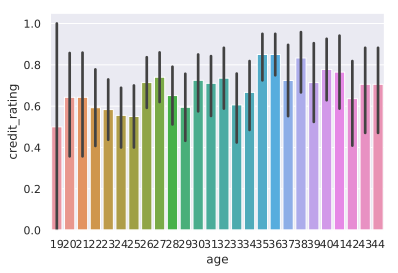

In [23]:
sns.barplot(x='age', y='credit_rating', data=df.loc[df.age <= 44])

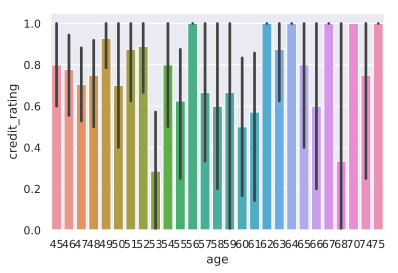

In [24]:
sns.barplot(x='age', y='credit_rating', data=df.loc[df.age > 44])

In [25]:
df.groupby('other_credits').credit_rating.value_counts()

other_credits  credit_rating
1              1                110
               0                 76
2              1                590
               0                224
Name: credit_rating, dtype: int64

In [26]:
df.groupby('apartment_type').credit_rating.value_counts()

apartment_type  credit_rating
1               1                109
                0                 70
2               1                528
                0                186
3               1                 63
                0                 44
Name: credit_rating, dtype: int64

In [27]:
df.groupby('bank_credits').credit_rating.value_counts()

bank_credits  credit_rating
1             1                433
              0                200
2             1                267
              0                100
Name: credit_rating, dtype: int64

In [28]:
df.groupby('occupation').credit_rating.value_counts()

occupation  credit_rating
1           1                 15
            0                  7
2           1                144
            0                 56
3           1                444
            0                186
4           1                 97
            0                 51
Name: credit_rating, dtype: int64

In [29]:
df.groupby('dependents').credit_rating.value_counts()

dependents  credit_rating
1           1                591
            0                254
2           1                109
            0                 46
Name: credit_rating, dtype: int64

In [30]:
df.groupby('telephone').credit_rating.value_counts()

telephone  credit_rating
1          1                409
           0                187
2          1                291
           0                113
Name: credit_rating, dtype: int64

In [31]:
df.groupby('foreign_worker').credit_rating.value_counts()

foreign_worker  credit_rating
1               1                667
                0                296
2               1                 33
                0                  4
Name: credit_rating, dtype: int64

In [32]:
df.head()

,credit_rating,account_balance,credit_duration_months,previous_credit_payment_status,credit_purpose,credit_amount,savings,employment_duration,installment_rate,marital_status,...,residence_duration,current_assets,age,other_credits,apartment_type,bank_credits,occupation,dependents,telephone,foreign_worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [33]:
classes = df.iloc[:, 0].values
classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [34]:
df.columns

Index(['credit_rating', 'account_balance', 'credit_duration_months',
       'previous_credit_payment_status', 'credit_purpose', 'credit_amount',
       'savings', 'employment_duration', 'installment_rate', 'marital_status',
       'guarantor', 'residence_duration', 'current_assets', 'age',
       'other_credits', 'apartment_type', 'bank_credits', 'occupation',
       'dependents', 'telephone', 'foreign_worker'],
      dtype='object')

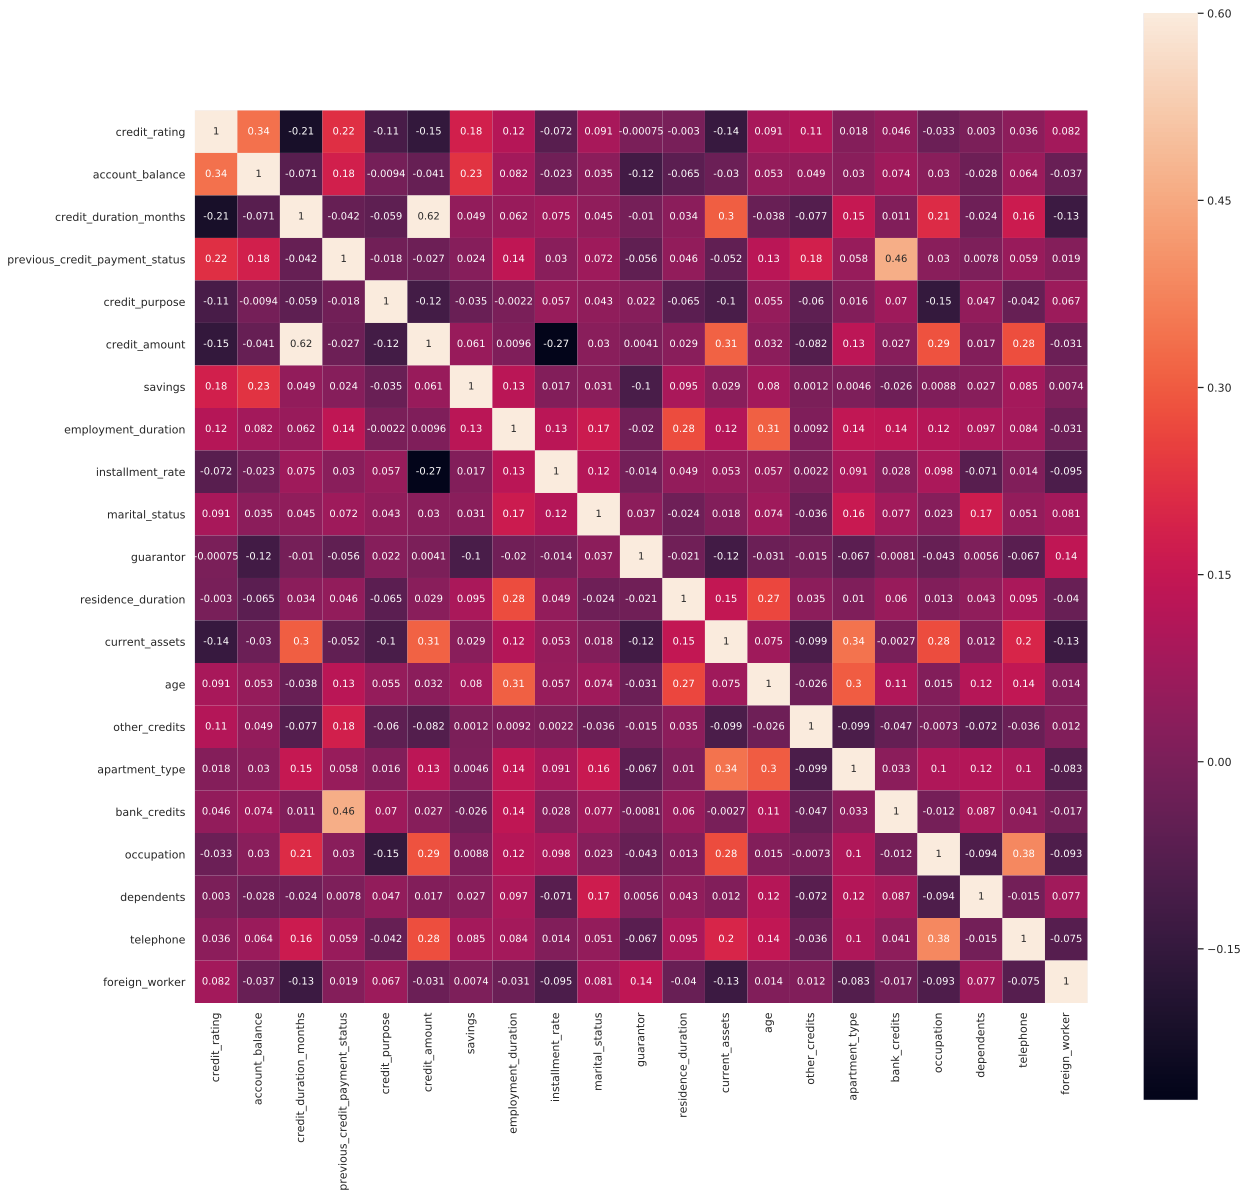

In [35]:
plt.figure(figsize=(20, 20))
sns_plot = sns.heatmap(df.corr(), vmax=0.6, square=True, annot=True)
sns_plot

In [36]:
df.drop(columns=['credit_rating', 'marital_status',
       'guarantor', 'age', 'apartment_type', 'occupation',
       'dependents', 'telephone', 'foreign_worker', 'credit_amount', 'installment_rate',
        'residence_duration', 'employment_duration', 'current_assets', 'other_credits',
       'bank_credits'], inplace=True)
df.columns

Index(['account_balance', 'credit_duration_months',
       'previous_credit_payment_status', 'credit_purpose', 'savings'],
      dtype='object')

In [37]:
df.head()

,account_balance,credit_duration_months,previous_credit_payment_status,credit_purpose,savings
0,1,18,3,2,1
1,1,9,3,4,1
2,2,12,2,4,2
3,1,12,3,4,1
4,1,12,3,4,1


In [38]:
forecasters = df.iloc[:, 1:18].values
forecasters

array([[18,  3,  2,  1],
       [ 9,  3,  4,  1],
       [12,  2,  4,  2],
       ...,
       [21,  3,  4,  4],
       [12,  2,  3,  4],
       [30,  2,  2,  4]])

In [39]:
scaler = StandardScaler()
forecasters = scaler.fit_transform(forecasters)
forecasters

forecasters_train, forecasters_test, classes_train, classes_test = train_test_split(forecasters
                                                                                   , classes
                                                                                   , test_size=0.25
                                                                                   , random_state=0)

/home/martoso/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/martoso/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [40]:
count = collections.Counter(classes_test)
count[0]/(count[0]+count[1])

0.332

In [44]:
estimator_Random_Forest = RandomForestClassifier(n_estimators=30, random_state=0, criterion="entropy")
estimator_Random_Forest.fit(forecasters_train, classes_train)
# estimator_Random_Forest
predictions_Random_Forest = estimator_Random_Forest.predict(forecasters_test)
# predictions_Random_Forest


precision_Random_Forest = accuracy_score(classes_test, predictions_Random_Forest)
print('Precision: {:.2f}%\n'.format(precision_Random_Forest * 100))


matrix = confusion_matrix(classes_test, predictions_Random_Forest)
print('Confusion Matrix:'
  '\n\t0\t1\n0:\t{}\t{}'
  '\n1:\t{}\t{}'.format(matrix[0][0], matrix[0][1], matrix[1][0], matrix[1][1]))

Precision: 67.20%

Confusion Matrix:
	0	1
0:	30	53
1:	29	138


In [42]:
estimator_Naive_Bayes = GaussianNB()
estimator_Naive_Bayes.fit(forecasters_train, classes_train)
predictions_Naive_Bayes = estimator_Naive_Bayes.predict(forecasters_test)

precision_Naive_Bayes = accuracy_score(classes_test, predictions_Naive_Bayes)
print('Precision: {:.2f}%\n'.format(precision_Naive_Bayes * 100))


matrix = confusion_matrix(classes_test, predictions_Naive_Bayes)
print('Confusion Matrix:'
  '\n\t0\t1\n0:\t{}\t{}'
  '\n1:\t{}\t{}'.format(matrix[0][0], matrix[0][1], matrix[1][0], matrix[1][1]))

Precision: 71.60%

Confusion Matrix:
	0	1
0:	21	62
1:	9	158
